In [15]:
from math import log2

from graphviz import Source
import pandas as pd

# Decision Tree
This notebook demonstrates a very simple implementation of infering a decision tree from a table of boolean values. We will start off with a decision tree and translate it into data and then infer the decision tree from the data.

## Generating Data From Decision Tree

In [16]:
dt = ('x1', 0, ('x0', ('x2', 0, 1), 1))

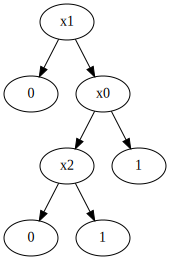

In [17]:
Source("""
digraph {
    x1 -> 0
    x1 -> x0
    x0 -> x2
    x0 -> 1
    x2 -> "0 "
    x2 -> "1 "  
}""")

Assuming that `x0 x1 x2` are boolean values, we can write the decision tree in python as:

In [18]:
def f(x0, x1, x2):
    if x1 == 0:
        return 0
    elif x1 == 1:
        if x0 == 0:
            if x2 == 0:
                return 0
            elif x2 == 1:
                return 1
        elif x0 == 1:
            if x2 == 0:
                return 1
            elif x2 == 1:
                return 1

There are three input variables so we can generate a matrix of eight rows to cover every permutation of the eight inputs

In [19]:
X = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1],
]

We pass each of the eight input rows into our function to generate our target variable `y`

In [20]:
y = [f(x0, x1, x2) for x0, x1, x2 in X]
y

[0, 0, 0, 1, 0, 0, 1, 1]

Finally we combine `X` and `y` into a DataFrame to make it a little easier to work with and we can see the truth table corresponding to the decision tree.

In [21]:
df = pd.DataFrame(X, columns=['x0', 'x1', 'x2'])
df['y'] = y
df

,x0,x1,x2,y
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,1
4,1,0,0,0
5,1,0,1,0
6,1,1,0,1
7,1,1,1,1


## Infering Decision Tree from Data

We can now apply the decision tree learning algorithm to infer a decision tree from the data. The algorithm recursively builds the tree from the top down by greedily selecting a variable to split on based on which variable produces the maximum information gain

In [22]:
def entropy(df):
    p = df.y.mean()
    q = 1 - p
    if p == 0 or q == 0:
        return 0
    else:
        return p * log2(1/p) + q * log2(1/q)

In [23]:
def split(df, c):
    left, right = df[df[c]==0].drop(columns=c), df[df[c]==1].drop(columns=c)
    return left, right

In [24]:
def information_gain(df, c):
    left, right = split(df, c)
    return entropy(df) - (entropy(left) + entropy(right)) / 2

In [25]:
def infer_tree(df):
    p = df.y.mean()
    q = 1 - p
    if p in (0, 1):
        return p
    else:
        ig_per_column = [information_gain(df, c) for c in df.columns[0:-1]]
        max_ig_column = df.columns[ig_per_column.index(max(ig_per_column))]
        print(f'information gain:{max(ig_per_column)} for column {max_ig_column}')
        left, right = split(df, max_ig_column)
        return (max_ig_column, infer_tree(left), infer_tree(right))

Our algorithm recovers the generating tree from the samples.

In [26]:
infer_tree(df)

information gain:0.5487949406953986 for column x1
information gain:0.3112781244591327 for column x0
information gain:1.0 for column x2


('x1', 0.0, ('x0', ('x2', 0.0, 1.0), 1.0))